# Midterm project

Congratulations! You've been hired as a data scientist at the hottest new social media startup.

Your company produces an app via which users can post short videos for anyone to view. They can also like, repost, and comment on the videos they view. The key data product is a recommendation engine that determines the order in which videos are shown to a user.

The recommendation engine has a parameter, *theta*, that affects the ordering of the videos. Recently the team of engineers that works on the recommendation engine ran it with different settings of *theta* and, for each setting, measured the amount of time users spent on the app. They have collected these measurements into a data set of 20 samples of (*theta*, *time_spent*) pairs.

Additionally, they have identified two auxiliary features (*aux1* and *aux2*) that they hypoithesize should correlate with *time_spent*. These two features are measures of time spent by users in the recent past. The engineers have not verified that the features explain *time_spent*.

(The engineers call these two features "auxiliary" because, while they might help explain *time_spent*, the engineers' ultimate interest lies in the dependence of *time_spent* on *theta*.)

Your first project at your new company is to tell the engineers which setting you this they should use for *theta*, based on the data.

## 1. Prepare the data
- Inspect the data. Identifiy and remove any suspicious or unusable samples.
- Put the samples in a data structure that you can work with.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import t

We see that time_spent has a negative number, which doesn't make sense.  We turn it to positive before starting our analysis.  We also see that aux2 has some values which are significantly larger and smaller than the rest, however, since this is certainly possible, given a normal distribution, we don't change the data.

In [ ]:
theta = [0.03906292, 0.05119367, 0.06004468, 0.06790036, 0.19152079,
       0.28298816, 0.294665  , 0.3578136 , 0.48352862, 0.53058676,
       0.55175137, 0.57560289, 0.59751325, 0.6375209 , 0.65241862,
       0.65633352, 0.78698546, 0.8640421 , 0.87729053, 0.94568319]
aux1 = [ 0.53983961, -1.77528229,  1.31487654, -0.47344805, -1.0922299 ,
       -0.25002744, -0.9822943 ,  1.03126909,  0.49133378, -0.4466466 ,
       -0.80636008,  0.13126776, -1.21256024,  0.15999085, -0.75522304,
        0.34989599,  0.97754176, -0.13858525,  0.10385631,  0.30059104]
aux2 = [ 0.9682053 ,  0.86962384,  0.56778309,  0.46528234, -1.16537308,
       -2.03599479, -1.15541329,  3.34515739,  0.12672721, -0.6941789 ,
        0.55767443,  0.0991466 ,  0.63792617,  0.70311068, -0.91609315,
       -0.78601423,  1.1191818 , -0.98339611,  0.24452002, -0.58140974]
time_spent = [10.79768391, 10.87648065, 10.29274937, 10.78756647,  9.51844772,
        9.18078781,  9.90063639, 12.84823357, 10.92743478,  9.88927608,
       11.3373709 , 11.43996915, 11.88392171, 11.88135476, 11.73452467,
       11.18844425, 12.19144316, 11.35294826, 12.2385441 , 11.98428985]

## 2. Build a model  

Write functions to run a regression, calculate the regression statistics listed below, and print a report.
- B (regressor coefficients plus one for an intercept, if appropriate)
- R2
- RSS
- RegSS
- TSS
- t statistic for each regressor coefficient

I found it useful to decompose the problem into three functions: `regress_calc()`, `regress_tstat()`, and `regress_report()`. You may write it however you see fit.  

You may include either, both, or neither of *aux1* and *aux2* in your final model. Experiment. What works best? Justify your decision.

We use stats.linregress to get the basic stats and the chart to view the data

Here is what we will get from stats.lineregress (info from scipy.org):

The return value is an object with the following attributes:

* slopefloat : Slope of the regression line.
* interceptfloat: Intercept of the regression line.
* rvaluefloat: Correlation coefficient.
* pvaluefloat: Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic.
* stderrfloat: Standard error of the estimated slope (gradient), under the assumption of residual normality.

We also create a function called individual_stats which is based off of [here](https://stackoverflow.com/a/42677750).

In [ ]:
def individual_stats(x,y):
  X = x.reshape(-1,1)
  y = y.reshape(-1,1)

  lm = LinearRegression()
  lm.fit(X,y)
  params = np.append(lm.intercept_,lm.coef_)
  predictions = lm.predict(X)

  #for data frame
  #newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
  #MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

  newX = np.append(np.ones((len(X),1)), X, axis=1)
  MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

  var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
  sd_b = np.sqrt(var_b)
  ts_b = params/ sd_b

  p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

  sd_b = np.round(sd_b,3)
  ts_b = np.round(ts_b,3)
  p_values = np.round(p_values,3)
  params = np.round(params,4)

  myDF3 = pd.DataFrame()
  myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
  print(myDF3)

In [ ]:
x = np.array(theta)
y = np.array(time_spent)

def run_all(x,y): 
  #use stats library to get all the info
  slope, intercept, r, p, std_err_a = stats.linregress(x, y)

  #get the prediction
  z = slope*x+intercept

  #get the stats
  TSS = ((y-y.mean())**2).sum()
  RSS = ((y-z)**2).sum()
  r2 = 1 - (RSS/TSS)
  RegRSS = TSS - RSS

  print("slope:\t\t",slope, "\nintercept:\t", intercept,"\nr:\t\t",r,"\nstd_err:\t", std_err_a )
  print("TSS:\t\t",TSS,"\nRSS:\t\t",RSS,"\nr2:\t\t",r2,"\nRegRSS:\t\t",RegRSS)
  
  print()
  individual_stats(x,y)
  print()
  
  plt.scatter(x, y)
  plt.plot(x, z)
  plt.show()

slope:		 1.9442273815396436 
intercept:	 10.188665132109321 
r:		 0.5814437446870533 
std_err:	 0.6412197527774525
TSS:		 18.20345280971413 
RSS:		 12.04928722086768 
r2:		 0.33807682823570306 
RegRSS:		 6.15416558884645

   Coefficients  Standard Errors  t values  Probabilities
0       10.1887            0.355    28.666          0.000
1        1.9442            0.641     3.032          0.007



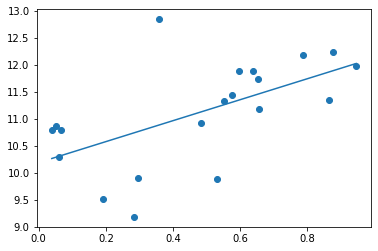

In [ ]:
run_all(x,y)

Above we have the slope as B and the intercept as A (from our model).  The r is .37, which shows that a linear regression is perhaps not the best model since the r is relatively low. 

**Important Note:** We have returned the standard error of the gradient, as such we need to convert it via SEG = SEE / sqrt( sum of (X - average X)**2 )

In [ ]:
#getting the SEE
a = x-x.mean()
b = a**2
c = b.sum()
see = std_err_a*np.sqrt(c)
see

0.818171648007776

Below we do it the same way as in class. And we note that the slope and intercept match.  Such that: A = intercept and B = slope.

alpha:	 10.188665132109321 
beta:	 1.9442273815396434



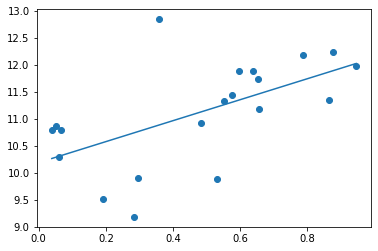

In [ ]:
x = np.array(theta)
y = np.array(time_spent)

ym = y-y.mean()
xm = x-x.mean()
beta = (xm*ym).sum()/(xm**2).sum()
alpha = y.mean()-beta*x.mean()

#printing the alpha and beta
print("alpha:\t", alpha,"\nbeta:\t",beta)
print()

reg = beta*x+alpha
plt.scatter(x, y)
plt.plot(x, reg)
plt.show()

Here I find the error step by step. I use the book formula which is E = Y - Y(bar).  I then do SE = sqrt(sum(error^2)/n-2).  I will later confirm my findinds using the OLS statsmodel.

In [ ]:
#find the error step by step

err = y-(reg)
sq_err = err**2
sum_err = sq_err.sum()
standard_error = np.sqrt(sum_err/18)
standard_error

0.818171648007776

Testing the sm.OLS. Please note that when using the OLS statsmodel we need to add a constant column.

In [ ]:
import statsmodels.api as sm
x = np.array(theta)
y = np.array(time_spent)

x = sm.add_constant(x) # intercept
model = sm.OLS(y,x)
results = model.fit()
print("Standard error: ", np.sqrt(results.mse_resid))
print(results.summary())

Standard error:  0.818171648007776
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     9.193
Date:                Wed, 30 Jun 2021   Prob (F-statistic):            0.00717
Time:                        02:48:28   Log-Likelihood:                -23.312
No. Observations:                  20   AIC:                             50.62
Df Residuals:                      18   BIC:                             52.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.

## 3. Propose a setting for *theta*

Now that you have a model built, you should be able to plot estimated *time_spent* vs. *theta* over a reasonable range of *theta*.  By inspecting that plot -- and knowning that the company wants to maximize the time users spend on the app -- which value of *theta* would you propose the engineers use? Explain how the data and your model support your decision.

The engineer's have capacity to take another set of measurements. Which settings of *theta* do you suggest they measure? Why?


### Solution

From the charts displayed above I think that a theta of .6 is a good choice. It is in a cluster of many datapoints, and seems to determine a fair amount of information.  

I don't see any particular other measure of theta that is necessary, since theta can be used in the regression, and interpolation and extrapolation can lead us do understand every context.  I would only suggest getting more than 20 samples in order to better be able to approximate a solution.

## 4. Experiment or observation?

Is this data set experimental or observational? Explain clearly. Consider how the effect of *theta* on *time_spent* differs from the effect of *aux1* or *aux2*.

### Solution

We test aux1 and aux2 below.  Neither variables seems to be a very good predictor of here.  We see the spread is quite large and there is not much in terms of correlation.  It is not seem that any of the statistics show any compelling reason to choose them.  Also, we note that the data we have is likely observational and not experimental, which, given the opportunity, we should really look for a larger sample size than 20. 

slope:		 0.4610118375566009 
intercept:	 -0.3456928377606051 
r:		 0.16485223826342088 
std_err:	 0.650126780840359
TSS:		 12.732378043337649 
RSS:		 12.386359621350866 
r2:		 0.027176260460459734 
RegRSS:		 0.34601842198678234

   Coefficients  Standard Errors  t values  Probabilities
0       -0.3457             0.36    -0.959          0.350
1        0.4610             0.65     0.709          0.487



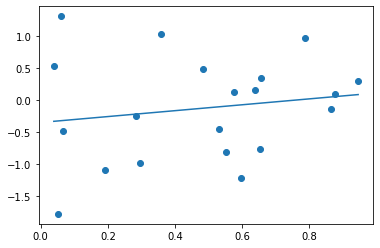

In [ ]:
x = np.array(theta)
y = np.array(aux1)

run_all(x,y)

slope:		 -0.6046288771717166 
intercept:	 0.3566564164462237 
r:		 -0.15141842930685562 
std_err:	 0.9303305488179595
TSS:		 25.95944265572946 
RSS:		 25.364256476814635 
r2:		 0.02292754073375547 
RegRSS:		 0.5951861789148261

   Coefficients  Standard Errors  t values  Probabilities
0        0.3567            0.516     0.692          0.498
1       -0.6046            0.930    -0.650          0.524



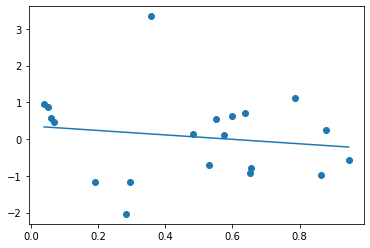

In [ ]:
x = np.array(theta)
y = np.array(aux2)

run_all(x,y)